In [179]:
%matplotlib inline
import nibabel as nib
from pathlib import Path
import re
import pandas as pd
import numpy as np
import seaborn as sns
import nilearn.plotting as niplt
from nibabel.processing import resample_from_to
sns.set(style="white")


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [309]:
datasets = Path("D:/neuroscout/datasets/")
god = datasets / "generic_object_decoding/derivatives/neuroscout/AW/fitlins"
merlin = datasets / "SherlockMerlin/derivatives/neuroscout/bB/fitlins"

In [310]:
contrasts = {re.findall('.*-(.*)_stat.*', fname.as_posix())[0]: nib.load(fname.as_posix())
             for fname in merlin.glob('*stat.nii.gz')}

In [311]:
ref = contrasts['adult']

In [312]:
data = {}
for con, nii in contrasts.items():
    data[('merlin', con)] = pd.Series(nii.get_data().flatten())
    
    mf = list(god.glob('*{}_stat.nii.gz'.format(con)))[0].as_posix()
    img = nib.load(mf)
    img = resample_from_to(img, ref)
    data[('god', con)] = pd.Series(img.get_data().flatten())

### Correlation matrix

In [313]:
corr = pd.DataFrame(data).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [314]:
corr.loc['god', 'merlin']

,adult,brightness,color,furniture,military,outdoors,people,technology,travel,vehicle,vibrance
adult,0.014151,0.102672,0.029665,-0.042220,0.014647,-0.101316,-0.006595,0.014496,-0.078899,0.037772,0.001766
brightness,0.148274,-0.124792,0.029790,0.084493,-0.139146,0.136062,-0.096388,-0.040197,0.054347,-0.021823,-0.012974
color,-0.061593,0.027904,-0.017559,-0.049187,0.106272,-0.053026,0.042143,0.032668,-0.031140,-0.009117,0.008270
furniture,0.001735,-0.065688,0.039204,0.006480,-0.002009,0.036167,-0.010052,-0.039816,0.044402,0.012529,-0.010185
military,-0.024339,0.076899,-0.031751,-0.041859,0.058375,-0.081221,0.013524,0.029612,-0.002746,-0.013289,-0.003303
outdoors,0.042155,-0.013309,0.009751,0.019925,-0.063289,0.023892,-0.011103,-0.034453,-0.029414,0.045676,0.020460
people,-0.009312,-0.071407,0.001347,0.022764,-0.003453,0.026289,0.005665,-0.040220,0.029129,0.013394,0.044914
technology,0.011856,-0.094527,0.012477,0.035415,-0.048272,0.077115,-0.018980,-0.027149,0.039792,0.002633,0.029178
travel,-0.024330,0.005144,-0.079886,0.024572,-0.072587,0.124066,0.034488,0.075494,-0.012087,-0.063836,-0.020259
vehicle,-0.030141,0.068111,0.017775,-0.040192,0.088377,-0.102454,0.006670,0.004274,0.020603,-0.004424,-0.046862


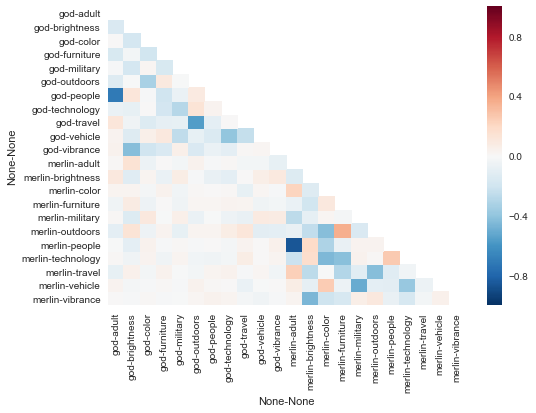

In [315]:
sns.heatmap(corr, mask=mask)

In [316]:
compare = corr.loc['god', 'merlin']
mask_c = np.zeros_like(compare, dtype=np.bool)
mask_c[np.triu_indices_from(mask_c, k=1)] = True

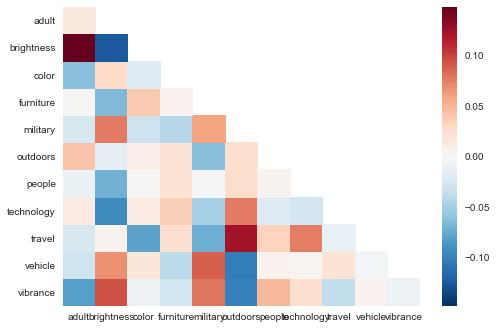

In [317]:
sns.heatmap(compare, mask=mask_c)